In [4]:
#Import standard libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Airlines.csv to Airlines.csv


In [6]:
#Read the top five rows in data
data=pd.read_csv('Airlines.csv')
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [7]:
#Check the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


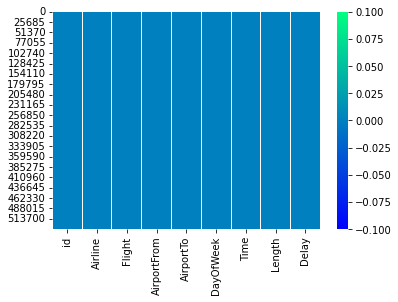

In [8]:
#Let's Check the null values in data set using the heatmap
sns.heatmap(data.isna(),cmap='winter')

In [9]:
#Let's check the statstics
data.describe().style.background_gradient(cmap='Reds')

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


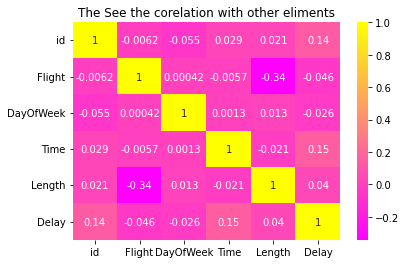

In [10]:
#Lest see the corelation with the other variables
sns.heatmap(data.corr(),annot=True,cmap='spring')
plt.title("The See the corelation with other eliments")
plt.show()

In [11]:
#Let's drop the unknow columns in the dataset
data=data.drop(['id'],axis=1)
#Let's print the data
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


In [12]:
#Let's check the unique airlines
unique=data['Airline'].unique()

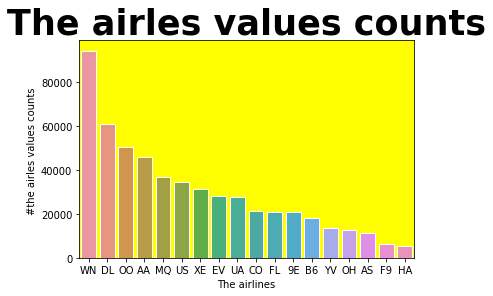

In [13]:
#Let's Check the which airline have more time repet
airline=data['Airline'].value_counts()
ax=plt.axes()
ax.set(facecolor='yellow')
sns.set(rc={'figure.figsize':(18,7)},style='darkgrid')
ax.set_title("The airles values counts",fontsize=35,fontweight='bold') 
sns.barplot(x=airline.index,y=airline)
plt.ylabel("#the airles values counts ")
plt.xlabel("The airlines")
plt.show()

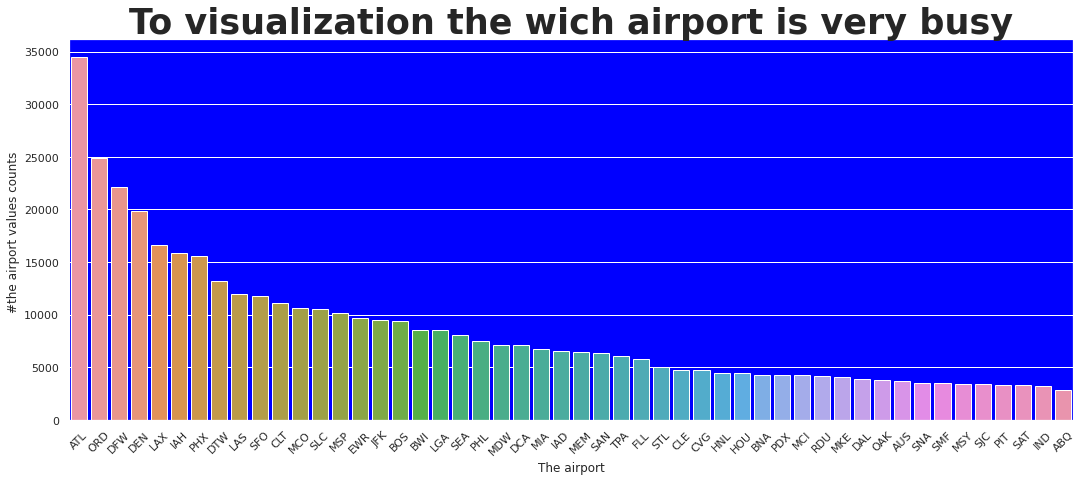

In [14]:
#Let's check teh busy airport
airline=data['AirportTo'].value_counts()[:50]
ax=plt.axes()
ax.set(facecolor='blue')
sns.set(rc={'figure.figsize':(18,7)},style='darkgrid')
ax.set_title("To visualization the wich airport is very busy",fontsize=35,fontweight='bold') 
sns.barplot(x=airline.index,y=airline)
plt.ylabel("#the airport values counts ")
plt.xticks(rotation=45)
plt.xlabel("The airport")
plt.show()

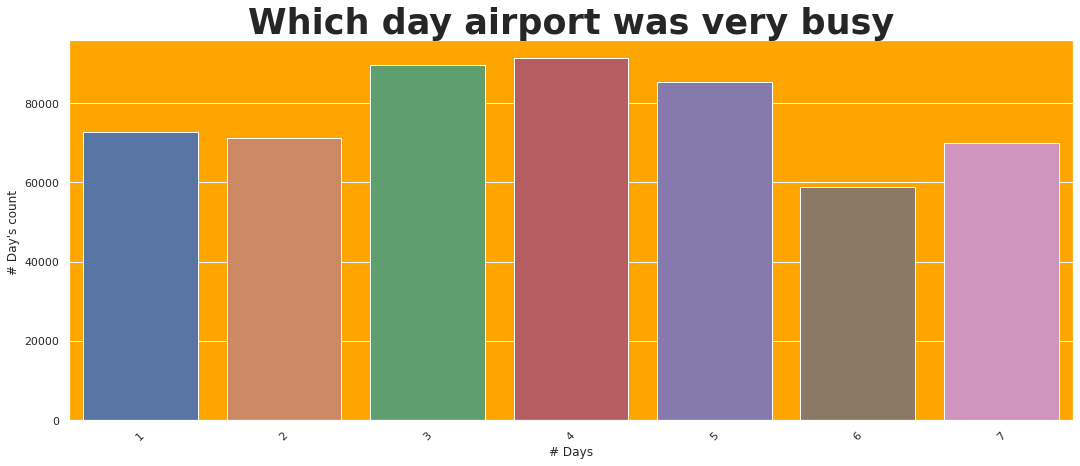

In [15]:
#Let's check the which day airport was very busy
airline=data['DayOfWeek'].value_counts()
ax=plt.axes()
ax.set(facecolor='orange')
sns.set(rc={'figure.figsize':(18,7)},style='darkgrid')
ax.set_title("Which day airport was very busy",fontsize=35,fontweight='bold') 
sns.barplot(x=airline.index,y=airline)
plt.ylabel("# Day's count ")
plt.xticks(rotation=45)
plt.xlabel("# Days")
plt.show()

In [16]:
#So Let's check which day which airport was very busy
airport=data.groupby(['Airline','DayOfWeek']).size().reset_index().rename(columns={0:"airline_dayweek"}).sort_values(by='airline_dayweek',ascending=False)
airport.head().style.background_gradient(cmap='plasma')

,Airline,DayOfWeek,airline_dayweek
108,WN,4,16118
107,WN,3,16118
109,WN,5,14393
106,WN,2,12808
105,WN,1,12808


In [17]:
fig=px.histogram(airport,x='Airline',y='airline_dayweek',color='DayOfWeek',title="Which day which airport was vey busy")
fig.update_layout(bargap=0.5,plot_bgcolor='black')
fig.show()

In [18]:
#So Let's check which the longest time taken from airportfrom to airport to
airport_time=data.groupby(['AirportFrom','AirportTo','Time']).size().reset_index().rename(columns={0:"airline_time"}).sort_values(by='Time',ascending=False)
airport_time.head().style.background_gradient(cmap='pink')

,AirportFrom,AirportTo,Time,airline_time
44125,SFO,MKE,1439,15
43333,SFO,ATL,1439,16
32973,OGG,SNA,1439,14
22975,JFK,SJU,1439,22
22873,JFK,PSE,1439,31


In [19]:
#Let's visualization the above data using plotly
fig=px.histogram(airport_time[:100],x='AirportFrom',y='Time',color='AirportTo',title="To Find the largest journey ")
fig.update_layout(bargap=0.5,plot_bgcolor='pink')
fig.show()

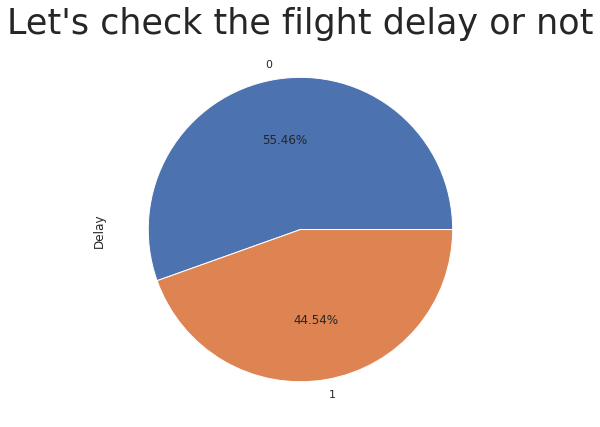

In [20]:
#Let's check the flight delay or not
data['Delay'].value_counts().plot(kind='pie',autopct="%1.2f%%")
plt.title("Let's check the filght delay or not",fontsize=35)
plt.show()

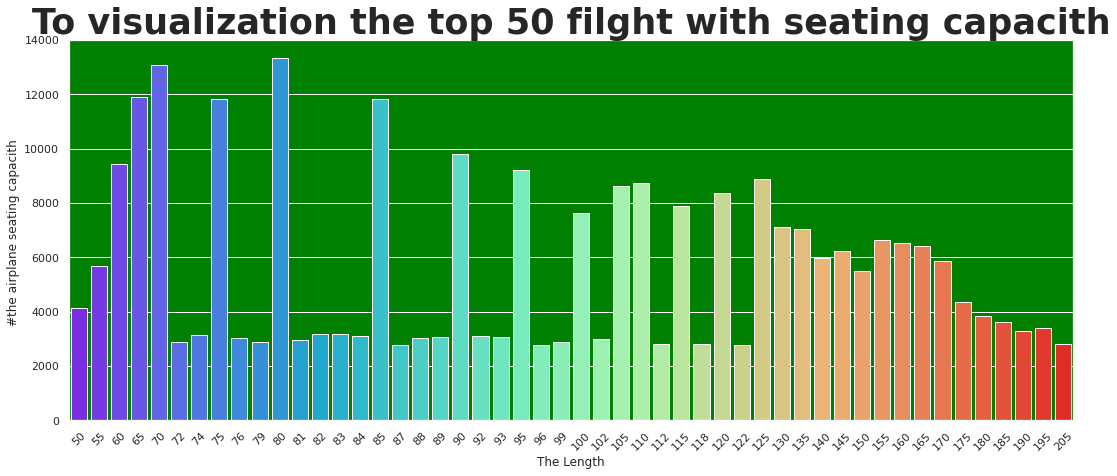

In [21]:
#Let's check the seat capacity
length=data['Length'].value_counts().sort_values(ascending=False)[:50]
ax=plt.axes()
ax.set(facecolor='green')
sns.set(rc={'figure.figsize':(18,7)},style='darkgrid')
ax.set_title("To visualization the top 50 filght with seating capacith",fontsize=35,fontweight='bold') 
sns.barplot(x=length.index,y=length,palette='rainbow')
plt.ylabel("#the airplane seating capacith ")
plt.xticks(rotation=45)
plt.xlabel("The Length")
plt.show()


In [22]:
#Let's check the which airline take long time for one place to another place
airplan=data.groupby(['Airline','Time']).size().reset_index().rename(columns={0:'the_airline'}).sort_values(by='Time',ascending=False)
airplan.head()

,Airline,Time,the_airline
8802,YV,1439,20
7199,US,1439,10
6790,UA,1439,36
1182,B6,1439,78
1757,CO,1439,47


In [23]:
#Let's visualization the above data using plotly
fig=px.histogram(airplan[:100],x='Airline',y='Time',color='the_airline',title="To visualization which airline is take longtime for reaching the distance ")
fig.update_layout(bargap=0.5,plot_bgcolor='brown')
fig.show()

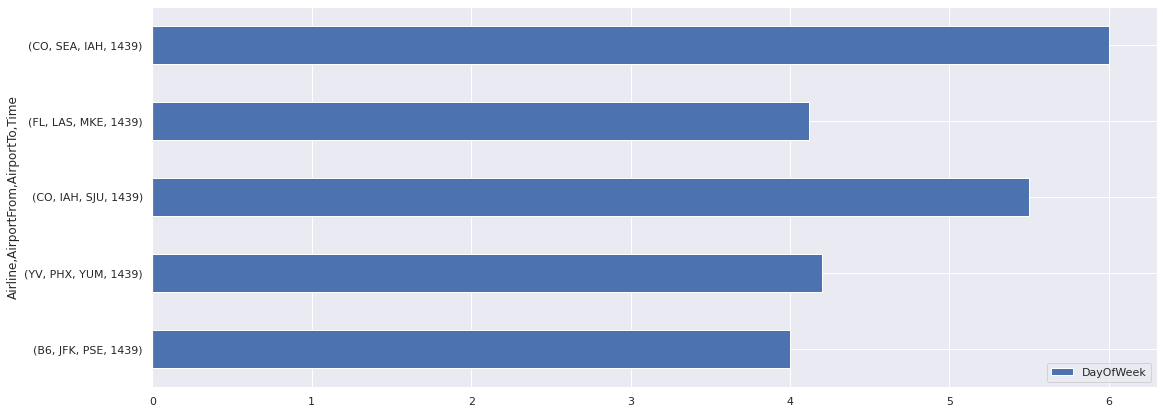

In [24]:
#Let's create some pivot table 
dataframe=pd.pivot_table(data,index=['Airline','AirportFrom','AirportTo','Time'],values=['DayOfWeek'],aggfunc='mean').sort_values(by='Time',ascending=False)
#Lets' visualization the above data
dataframe.head().plot(kind='barh')

In [25]:
#Let's covert the categrorical data to numerical data using the label encoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
#To initalize the label encoder
label=LabelEncoder()
sc=StandardScaler()

In [26]:
#Covert the data into numerical
data['Airline']=label.fit_transform(data['Airline'])
data['AirportFrom']=label.fit_transform(data['AirportFrom'])
data['AirportTo']=label.fit_transform(data['AirportTo'])


In [27]:
#So let's divided the dataset for x and y
X=data.drop(['Delay'],axis=1)
y=data['Delay']

In [28]:
X=sc.fit_transform(X)

In [29]:
#We divided the data training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=120)

In [30]:
#this is binary classification problem so we use classification algoritham such as logistic regression
logistic=LogisticRegression()
#Let's fit the training data to our model
logistic.fit(X_train,y_train)

LogisticRegression()

In [31]:
#Predict the output
y_pred=logistic.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [32]:
#Finaly we check the model test score
print(f'The Logistic model test score is  {logistic.score(X_test,y_test)*100 :.2f}')
#Finaly we check the model train score
print(f'The logistic model train score is {logistic.score(X_train,y_train)*100:.2f}')

The Logistic model test score is  58.46
The logistic model train score is 58.33


In [33]:
#Let's create another algorithm 
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',
    splitter='random',
    max_depth=50)
tree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=50, splitter='random')

In [34]:
#Let's check the decision tree algorithm score
print('The test accuracy_score is {:.2f}'.format(tree.score(X_test,y_test)*100))
#Let's check the decision tree train score
print('The train accuracy_score is {:.2f}'.format(tree.score(X_train,y_train)*100))

The test accuracy_score is 60.67
The train accuracy_score is 83.71


In [35]:
#So let's check the randomforest algorithm
from sklearn.ensemble import RandomForestClassifier
#intialize the model
random=RandomForestClassifier()
#fit the train 
random.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
#Finaly we check the model test score
print(f'The Logistic model test score is  {random.score(X_test,y_test)*100 :.2f}')
#Finaly we check the model train score
print(f'The logistic model train score is {random.score(X_train,y_train)*100:.2f}')

The Logistic model test score is  61.88
The logistic model train score is 83.71


Let's Create Artificial Neural Network using the Tensorflow

In [37]:
# import the tensorflow as tf
import tensorflow as tf

In [38]:
classifier=tf.keras.models.Sequential()
#Adding the first input layer
classifier.add(tf.keras.layers.Dense(units=11,activation='relu'))
#Adding the second input layer
classifier.add(tf.keras.layers.Dense(units=15,activation='relu'))
#Adding the therid input layes
classifier.add(tf.keras.layers.Dense(units=20,activation='relu'))
#Adding the fourth input layers
classifier.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Out put layes
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [41]:
# to  create the early stoping function which is stop the function with more accuracy score
early_stoping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [42]:
#fit the model to train data with 20 epochs
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=20,callbacks=early_stoping)

Epoch 1/20
26430/26430 [==============================] - 94s 3ms/step - loss: 0.6577 - accuracy: 0.6020 - val_loss: 0.6452 - val_accuracy: 0.6237
Epoch 2/20
26430/26430 [==============================] - 90s 3ms/step - loss: 0.6376 - accuracy: 0.6328 - val_loss: 0.6337 - val_accuracy: 0.6364


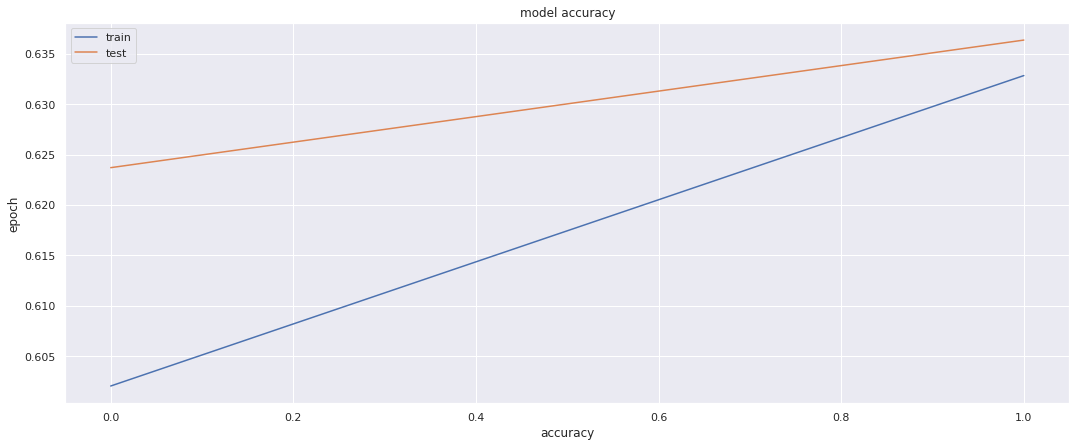

In [43]:
#Plot the accuray score
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

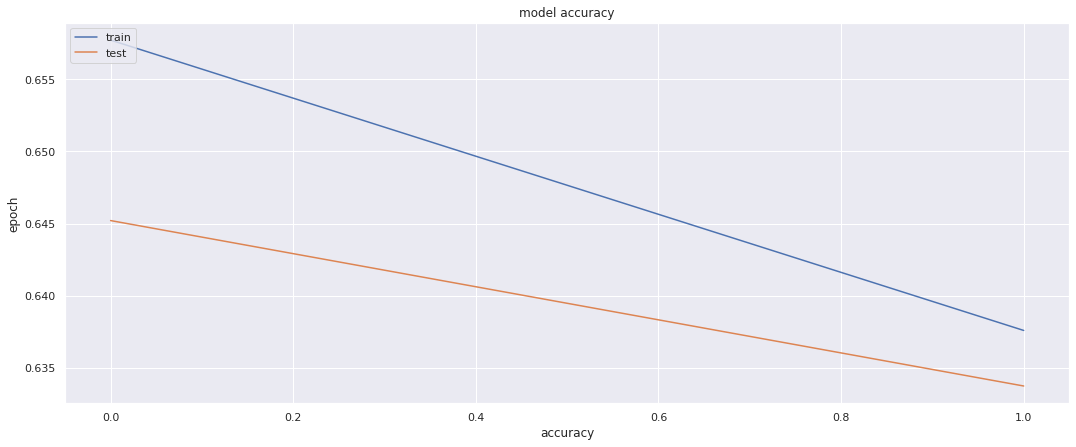

In [44]:
#plot the loss function with matplotlib
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [47]:
#Let's prediction
y_pred=classifier.predict(X_test> 0.5)
y_pred

array([[0.75706285],
       [0.39004776],
       [0.39774883],
       ...,
       [0.78821796],
       [0.7865168 ],
       [0.7537437 ]], dtype=float32)

** Finally we predict the flight delay prediction using the ANN method, with an accuracy_score is 63%**

**Thank you**